In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

data = datasets.load_breast_cancer()

In [2]:
X = data.data

y = data.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [4]:
model = DecisionTreeClassifier(criterion='gini',max_depth=8)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [5]:
expected = y_test
predicted = model.predict(X_test)

In [38]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        47
           1       0.96      0.96      0.96        67

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

[[44  3]
 [ 3 64]]


In [44]:
from sklearn.metrics import average_precision_score , recall_score
average_precision = average_precision_score(y_test, predicted)
recall = recall_score(y_test , predicted)
print('Average precision-recall score: {0:0.3f}'.format(
      average_precision))
print(recall)

Average precision-recall score: 0.939
0.9552238805970149


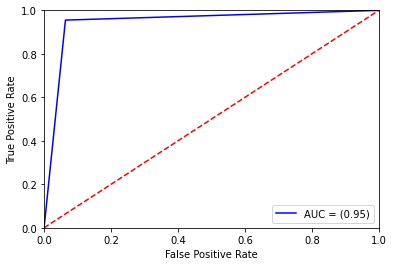

In [25]:
 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(expected, predicted)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'b', label = 'AUC = (%0.2f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [26]:
probs[:,-1] # These are the propabilities

array([0.        , 0.94117647, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 0.94117647, 0.94117647, 0.94117647, 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.94117647, 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 1.        , 0.     

In [27]:
fpr

array([0.        , 0.06382979, 1.        ])

In [28]:
tpr

array([0.        , 0.95522388, 1.        ])

In [29]:
#AUC was calculated based on Trapezoidal rule(Aprrox region under the curve.)
roc_auc

0.9456970466814862

In [16]:
threshold

array([2, 1, 0])

In [34]:
import numpy as np
from sklearn.metrics import precision_recall_curve
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
print(precision,'/n',recall,"/n",thresholds)


[0.66666667 0.5        1.         1.        ] /n [1.  0.5 0.5 0. ] /n [0.35 0.4  0.8 ]


Text(0.5, 1.0, '2-class Precision-Recall curve: Average Precision=0.94')

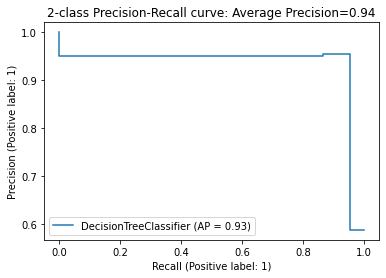

In [43]:
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'Average Precision={0:0.2f}'.format(average_precision))

[Text(869.9076923076923, 718.76, 'X[27] <= 0.142\ngini = 0.462\nsamples = 455\nvalue = [165, 290]'),
 Text(675.3230769230769, 634.1999999999999, 'X[23] <= 957.45\ngini = 0.146\nsamples = 303\nvalue = [24, 279]'),
 Text(560.8615384615384, 549.64, 'X[22] <= 107.75\ngini = 0.073\nsamples = 288\nvalue = [11, 277]'),
 Text(469.2923076923077, 465.0799999999999, 'X[12] <= 6.597\ngini = 0.036\nsamples = 269\nvalue = [5, 264]'),
 Text(423.5076923076923, 380.52, 'X[13] <= 48.975\ngini = 0.029\nsamples = 268\nvalue = [4, 264]'),
 Text(297.6, 295.9599999999999, 'X[6] <= 0.139\ngini = 0.022\nsamples = 265\nvalue = [3, 262]'),
 Text(183.13846153846154, 211.39999999999998, 'X[14] <= 0.003\ngini = 0.015\nsamples = 262\nvalue = [2, 260]'),
 Text(91.56923076923077, 126.83999999999992, 'X[23] <= 756.9\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(45.784615384615385, 42.27999999999997, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(137.35384615384615, 42.27999999999997, 'gini = 0.0\nsamples = 1\n

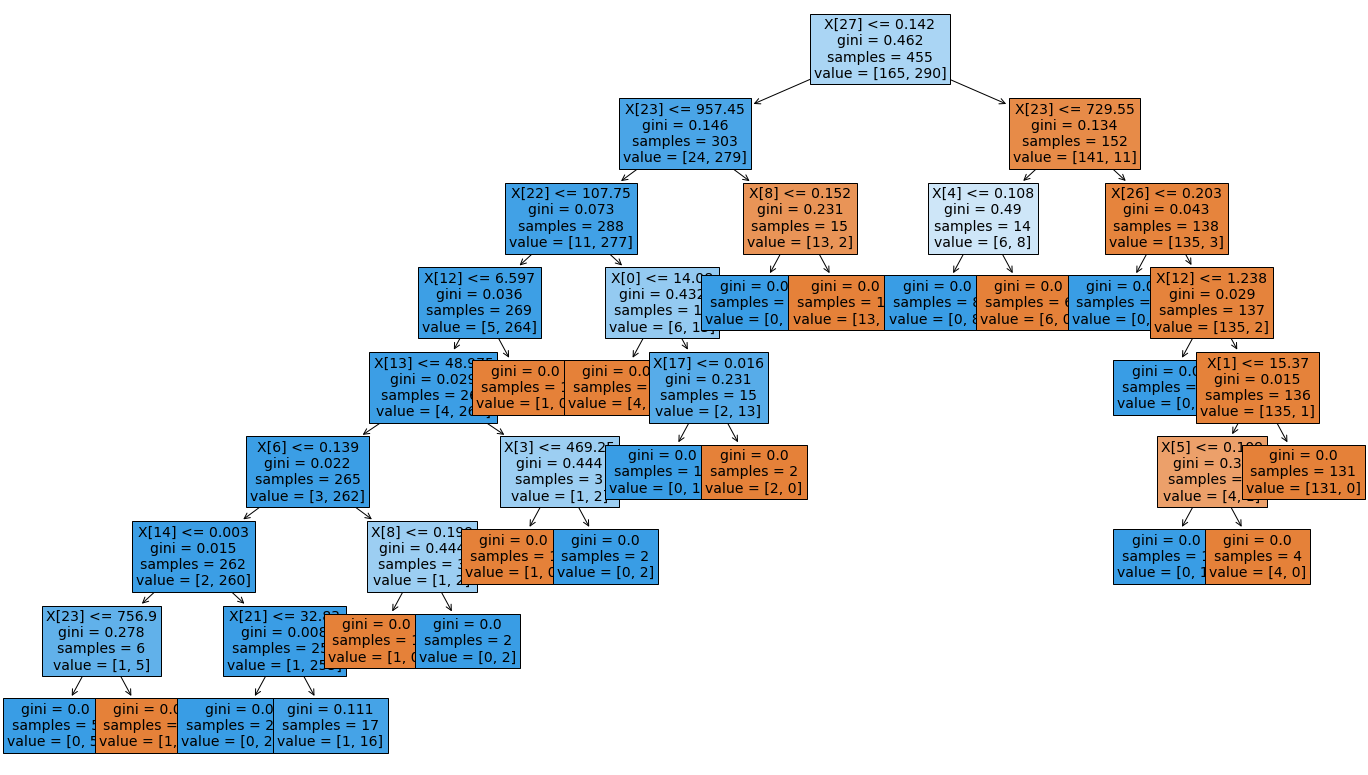

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(24,14))
from sklearn import tree
tree.plot_tree(model, filled=True, fontsize=14)